from thesis_figures/Fig4_0

In [174]:
import sys
sys.path.append('/Users/celia/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/celia/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [175]:
record = pd.read_csv('/Users/celia/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [176]:
record.shape

(801, 16)

20
K10
K11
K4
Q43
Q45
dumble
harry
myrtle
quirrel
sprout
tom
tonks
volde


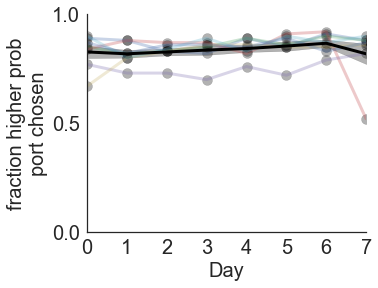

In [177]:
#mice = ['Baby','Sky','Raspberry','Wine','Mustard']
mice = np.unique(record['Mouse ID'].values) # get names of all mice in record
#mice = np.delete(mice,np.where(mice=='Dill')) # to exclude Dill until he's trained

print(mice.shape[0])
sns.set_style('white')
plt.figure(figsize=(5,4))
y = np.empty((mice.shape[0],10))
x = np.arange(0,10) # number of days to plot
k = 0 
for i,mouse in enumerate(mice):
    y_temp = record[((record['Mouse ID'] == mouse) & ((record['Left Reward Prob'] == 0.9) | (record['Left Reward Prob'] == 0.1)))]['p(high Port)'].values
    try:
        y[k,:] = y_temp[-10:] # values of fraction high port chosen for last 10 days
        plt.plot(x,y[k,:],label=mouse,alpha=0.3,linewidth=3)
        plt.scatter(x,y[k,:],label=mouse,alpha=0.3,s=100,color='black')
        k+=1
    except:
        print(mouse)
num_mice_included = k
plt.plot(x,y[0:num_mice_included,:].mean(axis=0),color='black',linewidth=3)
err = y[0:num_mice_included,:].std(axis=0)/np.sqrt(7)
plt.fill_between(x,y1=y[0:num_mice_included,:].mean(axis=0)+err,y2=y[0:num_mice_included,:].mean(axis=0)-err,color='black',alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,7)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1],fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('fraction higher prob\nport chosen',fontsize=20)
#plt.legend(loc='best')
sns.despine(top='True')

In [178]:
data90 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/full_9010_02192017.csv',index_col=0)
data80 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/full_8020_02192017.csv',index_col=0)
data70 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'
datas = data90.append(data80)
datas = datas.append(data70)

In [179]:
data=datas.reset_index()

In [180]:
data.tail(10)

,index,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward,Condition
77477,545,volde,07212016_volde,37.0,10.0,3.0,1.0,0.0,1.120,0.410,...,1.0,1.0,1.793,0.471,2.209,1.0,0.0,1.0,0.0,70-30
77478,546,volde,07212016_volde,38.0,10.0,-1.0,1.0,1.0,4.437,0.573,...,1.0,0.0,2.209,0.349,1.414,1.0,0.0,1.0,1.0,70-30
77479,547,volde,07212016_volde,39.0,10.0,1.0,1.0,1.0,1.429,0.447,...,1.0,1.0,1.414,0.422,2.183,1.0,0.0,1.0,0.0,70-30
77480,548,volde,07212016_volde,40.0,10.0,-1.0,1.0,1.0,1.893,0.410,...,1.0,0.0,2.183,0.456,1.608,0.0,1.0,0.0,1.0,70-30
77481,549,volde,07212016_volde,41.0,1.0,1.0,1.0,1.0,1.711,0.420,...,0.0,1.0,1.608,0.487,3.012,0.0,0.0,0.0,0.0,70-30
77482,550,volde,07212016_volde,42.0,2.0,-1.0,1.0,1.0,2.360,0.364,...,0.0,0.0,3.012,0.529,1.543,0.0,0.0,0.0,1.0,70-30
77483,551,volde,07212016_volde,43.0,3.0,1.0,1.0,0.0,3.402,0.505,...,0.0,1.0,1.543,0.416,40.498,1.0,1.0,1.0,1.0,70-30
77484,552,volde,07212016_volde,44.0,1.0,2.0,1.0,1.0,1.437,0.400,...,1.0,1.0,40.498,0.543,1.582,1.0,0.0,1.0,1.0,70-30
77485,553,volde,07212016_volde,45.0,2.0,3.0,1.0,1.0,1.108,0.463,...,1.0,1.0,1.582,0.487,1.915,1.0,0.0,1.0,1.0,70-30
77486,554,volde,07212016_volde,46.0,3.0,4.0,1.0,1.0,1.793,0.471,...,1.0,1.0,1.915,0.319,3.395,1.0,0.0,1.0,0.0,70-30


In [181]:
data.shape

(77487, 52)

In [182]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked',
           'Right Reward Prob','Left Reward Prob','Reward Given',
          'center_frame','decision_frame', 'Block ID']

for session in np.unique(data['Session ID'])[:]:
    
    # load in data from a particular session
    record[record['Session ID'] == session] # take only rows from record that match session name
    root_dir = '/Users/celia/GitHub/mouse_bandit/data/trial_data'
    full_name = session + '_trials.csv'
    path_name = os.path.join(root_dir,full_name)
    trial_df = pd.read_csv(path_name,names=columns) # load in full dataset from a single trial
    
    # determine block lengths and attach block id to each trial
    # identify blocks by trials where right reward probability changes
    blocks = list(np.diff(np.concatenate((range(1),np.where(np.diff(trial_df['Right Reward Prob']) != 0)[0]+2))))
    
    try: 
        #np.where(np.diff(trial_df['Right Reward Prob']) != 0)[0][-1]
        blocks.append(int(record[record['Session ID']==session]['No. Trials'].values)
                 -np.where(np.diff(trial_df['Right Reward Prob']) != 0)[0][-1]-1) # length of the last block at end
        block_id = np.asarray([x+1 for x in range(int(record[record['Session ID']==session]['No. Blocks'].values[0])+1)
            for y in range(blocks[x])])

        trial_df['Block ID'] = block_id[:-1] # add column in trial_df for block id
        
        # add block id and current block length to dataframe
        data.loc[data[data['Session ID']==session].index, 'Block ID'] = block_id[11:]
        temp = [blocks[x-1] for x in block_id[11:]]
        data.loc[data[data['Session ID']==session].index, 'Current Block Length'] = temp
    
    except IndexError: # report any errors - days when no blocks were completed
        print('No blocks in %s' %session)

datas=data.copy()
datas['Trial'] = datas['index']+11
datas.head(5)

,index,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,...,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward,Condition,Block ID,Current Block Length,Trial
0,0,K1,11042016_K1,11.0,9.0,-1.0,0.0,0.0,15.781,1.542,...,0.674,1.087,1.0,0.0,1.0,1.0,90-10,1.0,60.0,11
1,1,K1,11042016_K1,12.0,10.0,1.0,1.0,1.0,3.252,0.880,...,0.574,1.584,1.0,0.0,1.0,1.0,90-10,1.0,60.0,12
2,2,K1,11042016_K1,13.0,10.0,2.0,1.0,1.0,1.294,0.805,...,0.646,5.985,1.0,0.0,1.0,1.0,90-10,1.0,60.0,13
3,3,K1,11042016_K1,14.0,10.0,3.0,1.0,1.0,2.992,0.787,...,0.552,1.062,1.0,0.0,1.0,1.0,90-10,1.0,60.0,14
4,4,K1,11042016_K1,15.0,10.0,4.0,1.0,1.0,1.058,0.689,...,0.664,1.122,1.0,0.0,1.0,0.0,90-10,1.0,60.0,15


In [183]:
data_match_blocks = datas[datas['Current Block Length']<90] # take only blocks with fewer than 90 trials
data_match_blocks = data_match_blocks[data_match_blocks['Current Block Length']>50] # blocks with 30+ trials
datas = data_match_blocks.copy()

In [184]:
# because of blocks that get cut off at the end of a session, there will be some blocks shorter than 50 trials
np.sum(datas['Current Block Length']<50)

0

In [185]:
# how many blocks total are inclued?
temp=np.diff(datas['Block ID'])
print('# blocks=', np.sum(np.abs(temp)>0))

# blocks= 991


In [186]:
# what is the mean block length?
np.mean(datas['Current Block Length'])

72.29991188409147

In [187]:
datas.shape

(69227, 55)

In [188]:
num_mice_included = len(np.unique(datas['Mouse ID']))
num_mice_included

11

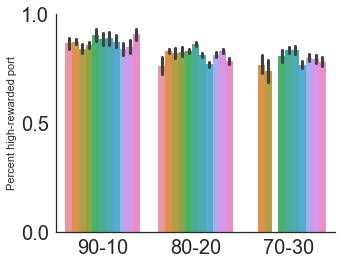

In [189]:
#ax2 = sns.barplot(x='Condition',y='Higher p port',data=datas)
plt.figure(figsize=(5,4))
ax1 = sns.barplot(x='Condition',y='Higher p port',data=datas[datas['Condition'] != '100-0'], hue='Mouse ID')
plt.yticks([0,0.5,1.0],fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Percent high-rewarded port')
plt.xlabel('')
ax1.legend_.remove()
sns.despine()

In [190]:
session_ids = np.unique(datas['Session ID'].values)
#session_ids = ['01182017_q43']
block_trials_ = np.array([])
for session in session_ids:
    data = datas[datas['Session ID']==session].copy()
    block_ends = data['Trial'].values[np.where(data['Block Trial'].values==0)[0]]
    
    for trial in data.iterrows():
        try:
            block_trial = block_ends[np.where(block_ends > trial[1]['Trial'])[0][0]] - trial[1]['Block Trial']
        except:
            block_trial = 0
        block_trials_ = np.append(block_trials_,block_trial)

In [191]:
datas['Block Trial Rev'] = datas['Block Trial'].values - datas['Current Block Length'].values

In [192]:
#datas['Block Trial Rev'] = block_trials_

In [193]:
block_trials = np.unique(datas['Block Trial'].values)
conditions = np.unique(datas['Condition'].values)
#mice = np.unique(datas.index)
p = np.zeros((block_trials.shape[0],2))
trial_stats = pd.DataFrame(data=None)
for condition in conditions:
        for i,trial in enumerate(block_trials):
            d = datas[datas['Condition']==condition]
            #d = d[d['Mouse ID']==mouse]
            d = d[d['Block Trial']==trial]
            '''
            boolean = (((datas['Block Trial'] == trial) 
                    & (datas['Condition']==condition))
                    & (datas['Mouse ID'] == mouse))
            
            t = datas[boolean]['Higher p port'].values
            '''
            t = d['Higher p port'].values
            p[i,0] = t.mean()
            p[i,1] = t.std()/np.sqrt(t.shape[0])

            d = {'Condition':condition,'trial':trial,
                 'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
            trial_stats = trial_stats.append(pd.DataFrame(data=d,index=[0]))

In [194]:
block_trials_rev = np.unique(datas['Block Trial Rev'].values)
conditions = np.unique(datas['Condition'].values)
p = np.zeros((block_trials_rev.shape[0],2))
trial_stats_ = pd.DataFrame(data=None)

for condition in conditions:
    for i,trial in enumerate(block_trials_rev):
        t = datas[((datas['Block Trial Rev'] == trial) 
                   & (datas['Condition']==condition))]['Higher p port'].values
        p[i,0] = t.mean()
        p[i,1] = t.std()/np.sqrt(t.shape[0])
    
        d = {'Condition':condition,'trial':trial,'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
        trial_stats_ = trial_stats_.append(pd.DataFrame(data=d,index=[0]))
        
#trial_stats_['trial'] = trial_stats_['trial']*-1

([<matplotlib.axis.XTick at 0x12cc3be80>,
 <a list of 3 Text xticklabel objects>)

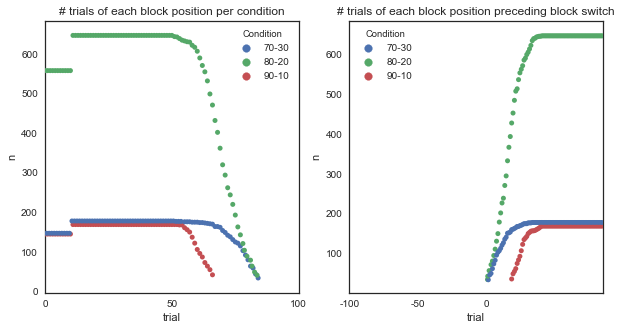

In [195]:
trial_stats = trial_stats[trial_stats['n'] > 30]
trial_stats_ = trial_stats_[trial_stats_['n'] > 30]

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats)
plt.xlim(0,100)
plt.xticks([0,50,100],[0,50,100])
plt.title('# trials of each block position per condition')

plt.subplot(122)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats_)
plt.title('# trials of each block position preceding block switch')
#plt.xlim(-100,0)
plt.xticks([0,-50,-100],[0,-50,-100])

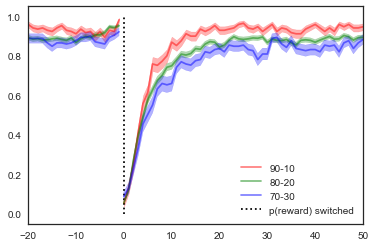

In [203]:
colors = ['red','green','blue','purple']
conditions=['90-10','80-20', '70-30']

for i,condition in enumerate(conditions):
    trial_stat = trial_stats[trial_stats['Condition']==condition]
    trial_stat_ = trial_stats_[trial_stats_['Condition']==condition]
    u = trial_stat['mean'].values
    e = trial_stat['sem'].values
    x = trial_stat['trial'].values
    
    u_ = trial_stat_['mean'].values
    e_ = trial_stat_['sem'].values
    x_ = trial_stat_['trial'].values
    
    plt.plot(x,u,color=colors[i],alpha=0.5,label=condition)
    plt.fill_between(x,y1=u-e,y2=u+e,color=colors[i],alpha=0.3)
    
    plt.plot(x_,u_,color=colors[i],alpha=0.5)
    plt.fill_between(x_,y1=u_-e_,y2=u_+e_,color=colors[i],alpha=0.3)
    
plt.vlines(x=0,ymin=0,ymax=1,linestyle='dotted',label='p(reward) switched')

plt.xlim(-20,50)
plt.legend(loc='lower right')

(array([   738.,   2518.,   6052.,   9291.,   9392.,  10662.,   9420.,
          9157.,   7210.,   4787.]),
 array([ 51. ,  54.8,  58.6,  62.4,  66.2,  70. ,  73.8,  77.6,  81.4,
         85.2,  89. ]),
 <a list of 10 Patch objects>)

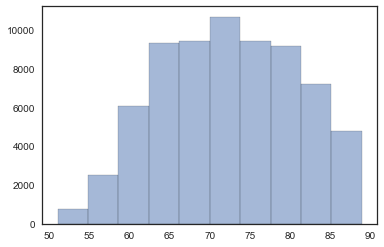

In [197]:
plt.hist(datas['Current Block Length'], histtype='bar', alpha=0.5, ec='black')

In [198]:
conditions = ['90-10','80-20','70-30']
#conditions = ['90-10', '80-20']
u_avg_ = np.zeros(3)
e_avg_ = np.zeros(3)
for i,condition in enumerate(conditions):
    trials = trial_stats_[((trial_stats_['trial'] > -15) 
                           & (trial_stats_['trial'] < 0)
                           & (trial_stats_['Condition']==condition))]
    
    u_avg_[i] = trials['mean'].mean()
    e_avg_[i] = np.sqrt(np.sum(trials['sem'].values**2) / (trials.shape[0]-1))

In [199]:
np.where(u >= u_avg_[2])

(array([23, 24, 25, 26, 27, 28, 29, 31, 34, 38, 42, 43, 44, 45, 46, 47, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 83,
        84]),)

In [200]:
stats = pd.DataFrame()
for c in conditions:
    for mouse in mice:
        d = datas[((datas['Condition'] == c) & (datas['Mouse ID'] == mouse))]
        if (d['Session ID'].unique().shape[0] > 1):
            s = bp.extract_session_stats(d)
            s['mouse'] = mouse
            s['condition'] = c
            s['n_trials'] = d.shape[0]
            s['n_sessions'] = d['Session ID'].unique().shape[0]
            stats = stats.append(s)

In [201]:
#all the block numbers
data = d.copy()
t_block_unique = np.unique(data['Block Trial'].astype(int))

    # initialize matrix for p(switch) at every trial number in block. 2nd column for SEM
p_switch_block = np.zeros((t_block_unique.shape[0],2))

    # initialize matrix for p(high_p_port)
high_p_port = np.zeros_like(p_switch_block)

'''
calculate p(switch) for each trial # in block (from 0 -> end)
'''
for t in t_block_unique:
    switches = data[data['Block Trial'] == t]['Switch']
    p_switch_block[t,0] = switches.mean(axis=0)
    p_switch_block[t,1] = switches.std(axis=0) / np.sqrt(switches.shape[0])
        
    highport = data[data['Block Trial']==t]['Higher p port']
    high_p_port[t,0] = highport.mean(axis=0)
    high_p_port[t,1] = highport.std(axis=0) / np.sqrt(highport.shape[0])


'''
calculate p(switch) and p(high port) for trial #s in block (from -L to +L)
'''

data.index = np.arange(data.shape[0]) # <-- this is important
switch_points = data[data['Block Trial'] == 0].index.values

L = 30
paraswitch = np.zeros((switch_points.shape[0],L*2 + 1))
paraswitch_port = np.zeros_like(paraswitch)

for i,point in enumerate(switch_points):
    try:
        paraswitch[i,:] = data.iloc[point-L:point+L+1]['Switch']
        paraswitch_port[i,:] = data.iloc[point-L:point+L+1]['Higher p port']
    except:
        pass

ValueError: Invalid RGBA argument: 0.97090092341870593

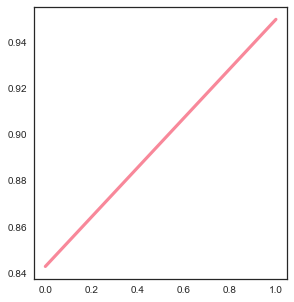

In [202]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='stable_phigh',hue='mouse',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0.5,1.05)
plt.title('stable fraction better port chosen')

plt.subplot(122)
sns.boxplot(x='condition',y='stable_phigh',data=stats)
sns.swarmplot(x='condition',y='stable_phigh',data=stats,color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0.5,1.05)
plt.title('stable fraction better port chosen')

ValueError: Invalid RGBA argument: 0.97090092341870593

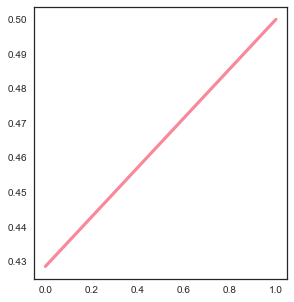

In [205]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='peak_pswitch',hue='mouse',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0,.5)
plt.title('peak fraction switch trials following block switch')

plt.subplot(122)
sns.boxplot(x='condition',y='peak_pswitch',data=stats)
sns.swarmplot(x='condition',y='peak_pswitch',data=stats,color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0,.5)
plt.title('peak fraction switch trials following block switch')

ValueError: Invalid RGBA argument: 0.97090092341870593

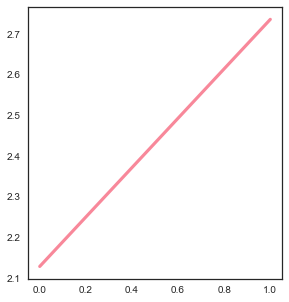

In [206]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='rebias_tau',hue='mouse',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
#plt.ylim(0.5,1.05)
plt.title('peak fraction switch trials following block switch')

plt.subplot(122)
sns.boxplot(x='condition',y='rebias_tau',data=stats)
sns.swarmplot(x='condition',y='rebias_tau',data=stats,color='0.25')
plt.legend(bbox_to_anchor=(1.5,1))
#plt.ylim(0.5,1.05)
plt.title('peak fraction switch trials following block switch')